In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


# ЗАДАНИЕ 1.

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

In [5]:
latest_date = df['Order Date'].max()

In [6]:
most_sales_all_time = df['Sub-Category'].value_counts().head(4)
most_sales_all_time

,count
Sub-Category,
Binders,1492
Paper,1338
Furnishings,931
Phones,876


In [7]:
two_years = latest_date - pd.DateOffset(years=2)
most_sales_two_years = df[df['Order Date'] >= two_years]['Sub-Category'].value_counts().head(4)
most_sales_two_years

,count
Sub-Category,
Binders,907
Paper,810
Furnishings,558
Phones,511


In [8]:
one_years = latest_date - pd.DateOffset(years=1)
most_sales_one_year = df[df['Order Date'] >= one_years]['Sub-Category'].value_counts().head(4)
most_sales_one_year

,count
Sub-Category,
Binders,496
Paper,454
Furnishings,310
Phones,291


### Вывод: Продажи за последние два года составляют значительную часть от всех продаж. Продажи за последний год составляют значительную часть от продаж за последний год. Из чего мы можем сделать вывод, что все подгруппы, находящиеся в топе продаж за всё время, сохраняют популярность, и при этом постепенно увеличивают обороты, особенно за последний год.


# ЗАДАНИЕ 2.

In [9]:
df['Sales'] = df['Sales'].apply(lambda x: str(x).replace(',', '.')).astype(float)

## Boxplot без удаления аномалий

<Axes: >

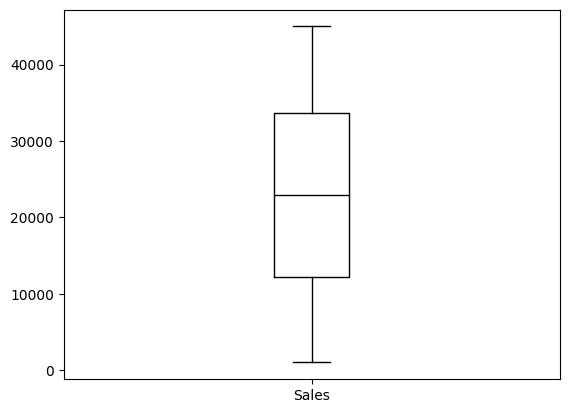

In [10]:
df.boxplot(column=['Sales'], grid = False, color = 'black')

## Метод 3 сигм

In [11]:
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()

In [12]:
lower_b = mean_sales - 3*std_sales
upper_b = mean_sales + 3*std_sales

In [13]:
three_sigma = df[(df['Sales'] >= lower_b) & (df['Sales'] <= upper_b)]
three_sigma

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


<Axes: >

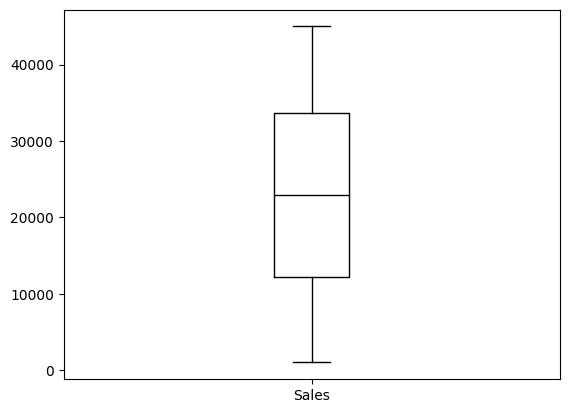

In [14]:
df.boxplot(column=['Sales'], grid = False, color = 'black')

## Метод интерквартального размаха

In [15]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR_dif = Q3 - Q1

In [16]:
lower_b = Q1 - 1.5 * IQR_dif
upper_b = Q3 + 1.5 * IQR_dif

In [17]:
IQR = df[(df['Sales'] >= lower_b) & (df['Sales'] <= upper_b)]

<Axes: >

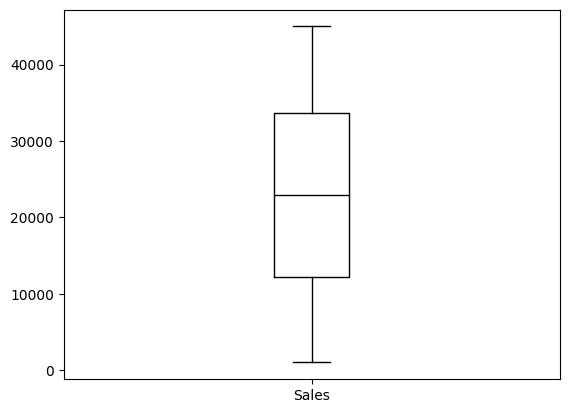

In [18]:
IQR.boxplot(column=['Sales'], grid = False, color = 'black')

Анализ

In [19]:
df['Sales'].min()

1002.794

In [20]:
df['Sales'].max()

44995.41

In [21]:
lower_b

-20256.132499999996

In [22]:
upper_b

66121.8875

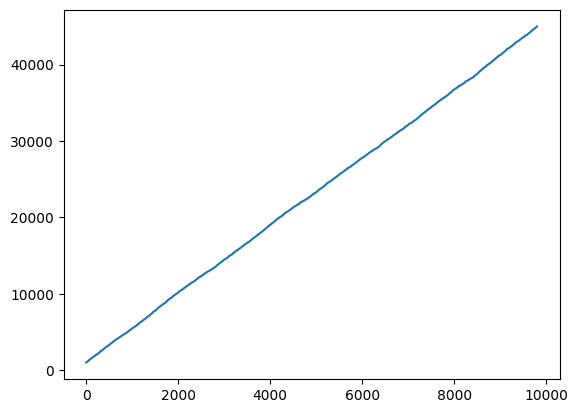

In [23]:
df_rank = df.sort_values(by='Sales')
df_rank['Rank'] = range(1, len(df_rank) + 1)
df_rank = df_rank.set_index('Rank')
plt.plot(df_rank['Sales'])

### Вывод: Можем заметить что Boxplot без предварительной обработки и после использования метода интерквартального размаха, выглядит одинаково. Проверив нижний и верхний пороги интерквартального размаха можно заметить, что у нас нет данных, которые выходили бы за пороги. Также построенный график отсортированного столбца Sales, говорит нам о том, что у нас отсутствуют хоть какие то выбросы. Все вышеперечисленное говорит нам о том, что у наших данных изначально отсутствовали хоть какие-то аномальные значения.

# ЗАДАНИЕ 3.

In [24]:
df['Sale_group'] = pd.qcut(df['Sales'], q=5, labels=[i for i in range(5)])

<ipython-input-25-b78d5dbc4f77>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df[['Region', 'Sale_group', 'Sales']].groupby(['Region', 'Sale_group']).count().reset_index()


<Axes: xlabel='Sale_group', ylabel='Sales'>

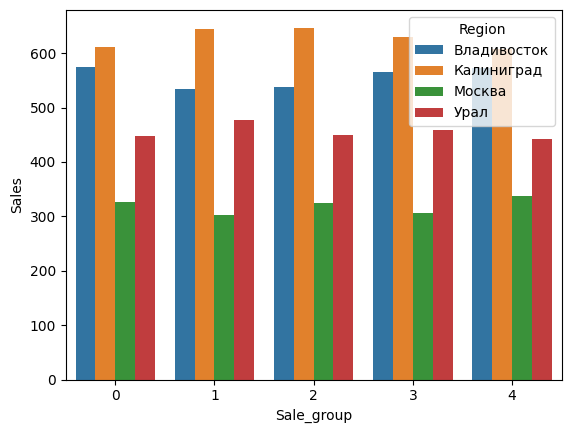

In [25]:
grouped_df = df[['Region', 'Sale_group', 'Sales']].groupby(['Region', 'Sale_group']).count().reset_index()

sns.barplot(grouped_df, x = 'Sale_group', y = 'Sales', hue = 'Region')

<ipython-input-26-fe3ced7ac304>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df[['Region', 'Sale_group', 'Sales']].groupby(['Region', 'Sale_group']).sum().reset_index()


<Axes: xlabel='Sale_group', ylabel='Sales'>

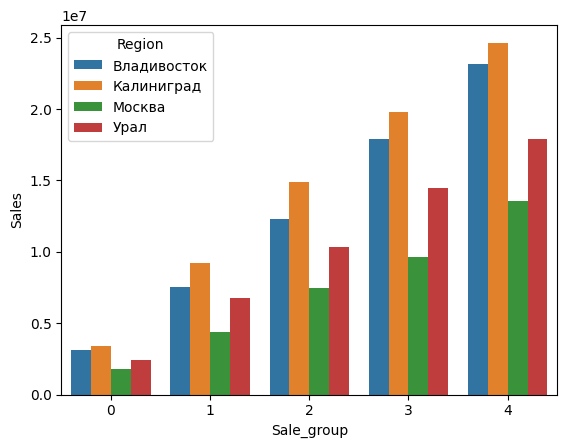

In [26]:
grouped_df = df[['Region', 'Sale_group', 'Sales']].groupby(['Region', 'Sale_group']).sum().reset_index()

sns.barplot(grouped_df, x = 'Sale_group', y = 'Sales', hue = 'Region')

<ipython-input-27-1156b63def42>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df[['Region', 'Sale_group', 'Sales']].groupby(['Region', 'Sale_group']).mean().reset_index()


<Axes: xlabel='Sale_group', ylabel='Sales'>

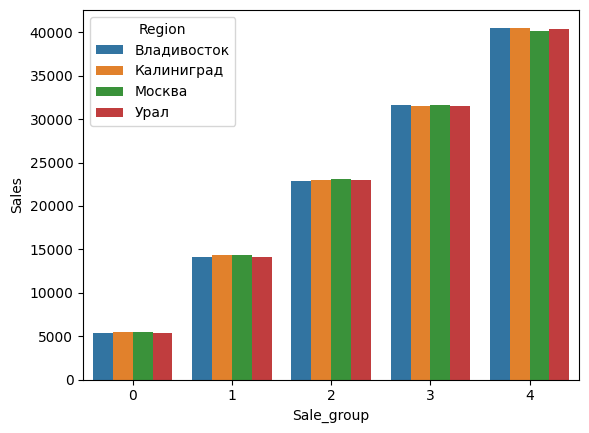

In [27]:
grouped_df = df[['Region', 'Sale_group', 'Sales']].groupby(['Region', 'Sale_group']).mean().reset_index()

sns.barplot(grouped_df, x = 'Sale_group', y = 'Sales', hue = 'Region')

### Вывод: Из построенных диаграм видно, что все группы закупают почти одинаковое количество товаров. Это касатеся всех регионов. И из-за того, что количество купленных товаров во всех группах почти одинаковое, следовательно более богатая группа будет более прибильной, что мы и видим на графике. Также можно заметить одинаковую картину по регионам. В каждой группе самой прибыльной является Калининград. Из всего вышеперечисленного можно сделать вывод, что наиболее прибыльная группа является группа под номером 5 из Калининграда.